<a href="https://colab.research.google.com/github/prasvijaya/datascienceportfolio/blob/master/topic_modelling_benchmark_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
type(newsgroups_train)

sklearn.utils.Bunch

Bunch is compressed format of all formats

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

news_groups= pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()])
news_groups

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11274,11275,11276,11277,11278,11279,11280,11281,11282,11283,11284,11285,11286,11287,11288,11289,11290,11291,11292,11293,11294,11295,11296,11297,11298,11299,11300,11301,11302,11303,11304,11305,11306,11307,11308,11309,11310,11311,11312,11313
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,From: guykuo@carson.u.washington.edu (Guy Kuo)...,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,From: jgreen@amber (Joe Green)\nSubject: Re: W...,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,From: bmdelane@quads.uchicago.edu (brian manni...,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,From: david@terminus.ericsson.se (David Bold)\...,From: rodc@fc.hp.com (Rod Cerkoney)\nSubject: ...,From: dbm0000@tm0006.lerc.nasa.gov (David B. M...,From: jllee@acsu.buffalo.edu (Johnny L Lee)\nS...,From: mathew <mathew@mantis.co.uk>\nSubject: R...,From: ab@nova.cc.purdue.edu (Allen B)\nSubject...,From: CPKJP@vm.cc.latech.edu (Kevin Parker)\nS...,From: ritley@uimrl7.mrl.uiuc.edu ()\nSubject: ...,From: abarden@tybse1.uucp (Ann Marie Barden)\n...,From: keith@cco.caltech.edu (Keith Allan Schne...,From: leunggm@odin.control.utoronto.ca (Gary L...,From: rpwhite@cs.nps.navy.mil (rpwhite)\nSubje...,From: csyphers@uafhp..uark.edu (Chris Syphers)...,From: nodine@lcs.mit.edu (Mark H. Nodine)\nSub...,From: kph2q@onyx.cs.Virginia.EDU (Kenneth Hinc...,From: nagle@netcom.com (John Nagle)\nSubject: ...,From: r4938585@joplin.biosci.arizona.edu (Doug...,From: jonh@david.wheaton.edu (Jonathan Hayward...,From: jimf@centerline.com (Jim Frost)\nSubject...,From: mrh@iastate.edu (Michael R Hartman)\nSub...,Subject: Teenage acne\nFrom: pchurch@swell.act...,From: xandor@unixg.ubc.ca (John Gilbert )\nSub...,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,From: joec@hilbert.cyprs.rain.com ( Joe Cipale...,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,From: static@iat.holonet.net (Joe Ehrlich)\nSu...,From: ebrandt@jarthur.claremont.edu (Eli Brand...,From: behanna@syl.nj.nec.com (Chris BeHanna)\n...,From: bressler@iftccu.ca.boeing.com (Rick Bres...,...,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,From: henry@zoo.toronto.edu (Henry Spencer)\nS...,From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...,From: bob1@cos.com (Bob Blackshaw)\nSubject: R...,From: J.Hale@latrobe.edu.au\nSubject: Re: Can ...,From: etxmesa@eos.ericsson.se (Michael Salmon)...,From: jake@bony1.bony.com (Jake Livni)\nSubjec...,From: smorris@venus.lerc.nasa.gov (Ron Morris ...,From: jmiller@network.com (Jeff J. Miller)\nSu...,From: pcarmack@gimp.kpc.com (Phil Carmack)\nSu...,Distribution: world\nFrom: elenay_creations@tc...,From: re4@prism.gatech.EDU (RUSSELL EARNEST)\n...,From: looper@cco.caltech.edu (Mark D. Looper)\...,From: gballent@hudson.UVic.CA (Greg Ballentin...,From: cka52397@uxa.cso.uiuc.edu (OrioleFan@uiu...,From: max@slinky.NYU.EDU (David Max)\nSubject:...,From: hades@coos.dartmouth.edu (Brian V. Hughe...,From: c23reg@kocrsv01.delcoelect.com (Ron Gask...,From: callison@uokmax.ecn.uoknor.edu (James P....,From: bigelos@hobo.ECE.ORST.EDU (Space Gigolo)...,From: LMARSHA@cms.cc.wayne.edu (Laurie Marshal...,From: gt5735a@prism.gatech.EDU (Mark Devaney)\...,From: pkeenan@s.psych.uiuc.edu (Patricia Keena...,From: CCMB <CCMB@MUSICA.MCGILL.CA>\nSubject: W...,From: cbetz@radioman.cray.com (Charles Betz {...,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,From: aa888@freenet.carleton.ca (Mark Baker)\n...,From: zmed16@trc.amoco.com (Michael)\nSubject:...,"From: rdippold@qualcomm.com (Ron ""Asbestos"" Di...",From: bchuang@css.itd.umich.edu (Ben Chuang)\n...,From: Pegasus@aaa.uoregon.edu (Pegasus)\nSubje...,From: shaig@composer.think.com (Shai Guday)\nS...,From: mrj@cs.su.oz.au (Mark James)\nS

Dataset has more columns than rows. We will transform these into Rows. 2nd row consists of Topics represented in Integers.

In [5]:
news_groups= pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
news_groups.columns = ['text', 'target']

# add target_names to understand what each topic id represented as
targets= pd.DataFrame(newsgroups_train.target_names)
targets.columns= ['title']

ngout= pd.merge(news_groups, targets, left_on='target', right_index=True)
df= ngout[:100]

In [6]:
pd.set_option('display.max_colwidth', -1)
ngout

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


text  ...      title
0      From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

**Data Cleaning:**

  Remove Punctuation and Lower casing the texts.

In [7]:
# Load the regular expression library
import re
import string
import spacy
spacy.load('en_core_web_sm')

# Get list of stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Remove punctuation
df['text_processed']= df['text'].apply(lambda x:remove_punctuation(x))

# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


text  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [8]:
# Get list of stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS

def preprocess(text):
      # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha() and lemma not in stopwords]

**Exploratory Analysis**

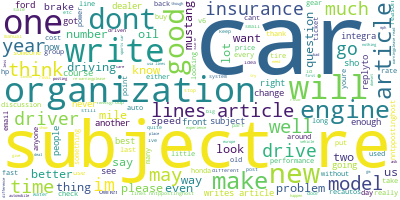

<Figure size 1008x720 with 0 Axes>

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

plt.figure(figsize=(14,10))
# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

**Tokenize words and further clean-up text**

In [10]:
import gensim
from gensim.utils import simple_preprocess


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data = df.text_processed.values.tolist()
        
data_words = list(sent_to_words(data))
print(data_words[:1])

[['from', 'lerxstwamumdedu', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntppostinghost', 'rac', 'wamumdedu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'email', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


**Phrase Modeling: Bi-grams and Tri-grams**

Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold.

The higher the values of these param, the harder it is for words to be combined.

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.phrases.Phrases(data_words, min_count=5, threshold=100) 

# higher threshold fewer phrases.
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


**Remove Stopwords, Make Bigrams and Lemmatize**

The phrase models are ready. Let’s define the functions to remove the stopwords, make trigrams and lemmatization and call them sequentially.

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])# Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['where', 'thing', 'car', 'nntppostinghost', 'line', 'wonder', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'name', 'engine', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'email', 'thank', 'bring', 'neighborhood', 'lerxst']]


**Data Transformation: Corpus and Dictionary**

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [14]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

**Base Model**

In addition to the corpus and dictionary, you need to provide the number of topics as well. Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior (we’ll use default for the base model).

  chunksize controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory.

  passes controls how often we train the model on the entire corpus (set to 10). Another word for passes might be “epochs”. iterations is somewhat technical, but essentially it controls how often we repeat a particular loop over each document. It is important to set the number of “passes” and “iterations” high enough.




In [15]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20, 
                                       random_state=999,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics()

In [16]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"course" + 0.021*"rally" + 0.018*"offroad" + 0.015*"participant" + '
  '0.012*"give" + 0.012*"point" + 0.010*"get" + 0.009*"drive" + 0.009*"must" + '
  '0.009*"award"'),
 (1,
  '0.023*"car" + 0.011*"would" + 0.009*"integra" + 0.009*"well" + '
  '0.008*"drive" + 0.008*"see" + 0.008*"time" + 0.007*"make" + 0.007*"kid" + '
  '0.007*"engine"'),
 (2,
  '0.018*"post" + 0.018*"discussion" + 0.016*"article" + 0.015*"car" + '
  '0.010*"group" + 0.010*"may" + 0.009*"question" + 0.007*"newsgroup" + '
  '0.007*"topic" + 0.006*"reason"'),
 (3,
  '0.037*"year" + 0.022*"insurance" + 0.021*"rate" + 0.019*"brake" + '
  '0.017*"go" + 0.016*"car" + 0.013*"be" + 0.011*"pay" + 0.010*"high" + '
  '0.009*"single"'),
 (4,
  '0.019*"car" + 0.014*"may" + 0.011*"write" + 0.010*"pocket" + '
  '0.010*"overpass" + 0.009*"think" + 0.009*"see" + 0.009*"kill" + '
  '0.009*"woman" + 0.008*"look"'),
 (5,
  '0.017*"car" + 0.017*"seal" + 0.013*"drive" + 0.013*"number" + 0.012*"show" '
  '+ 0.012*"line" + 0.0

**Compute Model Perplexity and Coherence Score**

In [17]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.34212392082234044


**Hyperparameter Tuning**

Model hyperparameters can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

Model parameters can be thought of as what the model learns during training, such as the weights for each word in a given topic.
Now that we have the baseline coherence score for the default LDA model, let’s perform a series of sensitivity tests to help determine the following model hyperparameters:

1. Number of Topics (K)(alrady given)
2. Dirichlet hyperparameter alpha: Document-Topic Density
3. Dirichlet hyperparameter beta: Word-Topic Density

We’ll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets. We’ll use C_v as our choice of metric for performance comparison

In [ ]:
pip install pyLDAvis

In [24]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.090656  0.000540  1       1        13.112400
15     0.102416  0.003940  2       1        11.981194
14     0.122406  0.008480  3       1        11.487189
2      0.003843 -0.218763  4       1        11.194234
4      0.110135 -0.066830  5       1        9.475193 
16     0.125176  0.024657  6       1        9.263035 
3      0.069588  0.144070  7       1        5.530205 
8      0.024648  0.010501  8       1        3.610500 
6      0.011853  0.006926  9       1        3.529752 
9      0.006020 -0.026013  10      1        3.136348 
13    -0.026341  0.039035  11      1        2.820010 
7     -0.059103  0.014996  12      1        2.791215 
11    -0.039357 -0.061938  13      1        2.218476 
0     -0.157012  0.000532  14      1        2.169753 
18    -0.025168  0.031885  15      1        1.959117 
12    -0.025324  0.024215  16      1        1.942945 
5     -0.055023  0.009864  17      1        1.302065 
10    -0.093111  0.026755  18      1        0.939646 
19    -0.099459  0.017281  19      1        0.885719 
17    -0.086843  0.009866  20      1        0.651002 , topic_info=             Term       Freq      Total Category  logprob  loglift
132  get           54.000000  54.000000  Default  30.0000  30.0000
40   year          46.000000  46.000000  Default  29.0000  29.0000
317  would         87.000000  87.000000  Default  28.0000  28.0000
352  write         75.000000  75.000000  Default  27.0000  27.0000
21   line          66.000000  66.000000  Default  26.0000  26.0000
..    ...                ...        ...      ...      ...      ...
71   change        0.346715   21.423998  Topic20 -5.1695   0.9107 
316  work          0.346598   14.365733  Topic20 -5.1698   1.3100 
33   small         0.346308   19.308895  Topic20 -5.1706   1.0134 
836  distribution  0.345919   14.642474  Topic20 -5.1718   1.2889 
341  put           0.345706   17.643988  Topic20 -5.1724   1.1019 

[1234 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2357  2      0.888597  aarm        
1061  2      0.888294  able        
992   1      0.804251  abort       
41    1      0.964756  acceleration
42    1      0.159289  accident    
...  ..           ...           ...
40    17     0.021489  year        
1208  10     0.290443  yet         
1208  12     0.290443  yet         
964   5      0.509573  young       
1209  12     0.733674  yuppie      

[2296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 16, 15, 3, 5, 17, 4, 9, 7, 10, 14, 8, 12, 1, 19, 13, 6, 11, 20, 18])